In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [42]:
h1 = [
    0.000019759668398688,
    0.000015890036735241,
    -0.000001038538619501,
    0.000010169538361776,
    0.000029836469307215,
    0.000017402576965288,
    0.000002351694661340,
    0.000022849571891005,
    0.000039016529006278,
    0.000017054415131411,
    0.000007669598695761,
    0.000038012583999999,
    0.000046204730487445,
    0.000014347392633462,
    0.000015740897003097,
    0.000055903445003000,
    0.000049805624942241,
    0.000008180933918444,
    0.000028294244097008,
    0.000077928296509026,
    0.000046368776235516,
    -0.000004931655610239,
    0.000051219333288692,
    0.000110801354768336,
    0.000021458014749439,
    -0.000042296665526430,
    0.000129473339626874,
    0.000209797962878849,
    -0.000350984248304533,
    -0.001444615385104960,
    -0.002355434538993967,
    -0.002749528438365807,
    -0.003008285659690636,
    -0.003482473766283418,
    -0.004024461975735564,
    -0.004434871935559468,
    -0.004828597900141805,
    -0.005331807991370252,
    -0.005839433085689589,
    -0.006267193873763696,
    -0.006710377116076591,
    -0.007220622743286335,
    -0.007707974672702111,
    -0.008141943624094188,
    -0.008602862080225029,
    -0.019681791830722238,
    -0.005180036072878971,
    0.000484762460052752,
    -0.017295377398058177,
    -0.020826568859878429,
    -0.001889895856827949,
    -0.002896785111096789,
    -0.024287649290399428,
    -0.019788542422803552,
    0.001843633561343451,
    -0.008435915055616810,
    -0.031188593597955120,
    -0.015926519129467825,
    0.005643549201878392,
    -0.016810712649154250,
    -0.037480388253475730,
    -0.008141204200681146,
    0.009119730156160757,
    -0.029554865927254648,
    -0.042702017885962257,
    0.006353266614033931,
    0.011906016419768142,
    -0.052010538450086227,
    -0.046436426851698007,
    0.039688083684698769,
    0.013706537792224922,
    -0.119328991549242008,
    -0.048382903119745524,
    0.301964072566740960,
    0.518000539843904262,
    0.301964072566739239,
    -0.048382903119745593,
    -0.119328991549242563,
    0.013706537792224929,
    0.039688083684698450,
    -0.046436426851697896,
    -0.052010538450086408,
    0.011906016419768246,
    0.006353266614033931,
    -0.042702017885962291,
    -0.029554865927254842,
    0.009119730156160697,
    -0.008141204200681099,
    -0.037480388253475619,
    -0.016810712649154319,
    0.005643549201878401,
    -0.015926519129467707,
    -0.031188593597955103,
    -0.008435915055616867,
    0.001843633561343450,
    -0.019788542422803396,
    -0.024287649290399359,
    -0.002896785111096782,
    -0.001889895856827924,
    -0.020826568859878259,
    -0.017295377398058143,
    0.000484762460052741,
    -0.005180036072878966,
    -0.019681791830722096,
    -0.008602862080225001,
    -0.008141943624094216,
    -0.007707974672702087,
    -0.007220622743286265,
    -0.006710377116076575,
    -0.006267193873763727,
    -0.005839433085689577,
    -0.005331807991370206,
    -0.004828597900141791,
    -0.004434871935559479,
    -0.004024461975735541,
    -0.003482473766283385,
    -0.003008285659690624,
    -0.002749528438365825,
    -0.002355434538993967,
    -0.001444615385104939,
    -0.000350984248304525,
    0.000209797962878846,
    0.000129473339626877,
    -0.000042296665526420,
    0.000021458014749441,
    0.000110801354768325,
    0.000051219333288694,
    -0.000004931655610241,
    0.000046368776235497,
    0.000077928296509016,
    0.000028294244097022,
    0.000008180933918450,
    0.000049805624942244,
    0.000055903445002991,
    0.000015740897003095,
    0.000014347392633455,
    0.000046204730487427,
    0.000038012584000012,
    0.000007669598695762,
    0.000017054415131420,
    0.000039016529006284,
    0.000022849571890990,
    0.000002351694661332,
    0.000017402576965272,
    0.000029836469307207,
    0.000010169538361780,
    -0.000001038538619484,
    0.000015890036735238,
    0.000019759668398690,
]

In [43]:
h2 = [
    -0.000029325598197971,
    -0.000068237481038549,
    -0.000109727879086783,
    -0.000145609845044585,
    -0.000168388561365724,
    -0.000173118265084261,
    -0.000158808425278254,
    -0.000129013382939307,
    -0.000091398260419923,
    -0.000056290943162974,
    -0.000034461081888397,
    -0.000034562416015890,
    -0.000060789219956395,
    -0.000111301145625121,
    -0.000177855113086811,
    -0.000246865038783095,
    -0.000301829462679107,
    -0.000326778173631692,
    -0.000310150855900422,
    -0.000248385084431781,
    -0.000148490602673772,
    -0.000029028607031481,
    0.000080822738460509,
    0.000144098520606372,
    0.000120406558222247,
    -0.000028843534824712,
    -0.000335181623234586,
    -0.000818658845986913,
    -0.001485011836350618,
    0.008468165960452015,
    0.007062331191521130,
    0.002967111271010529,
    -0.003248274731433422,
    -0.010484257452740842,
    -0.017326495775798870,
    -0.022350435903790850,
    -0.024451565046793217,
    -0.023128020794719442,
    -0.018647915499338894,
    -0.012054793568818689,
    -0.004997271919115454,
    0.000593383257883414,
    0.002919137791057287,
    0.000741603018576655,
    -0.006271957854003236,
    -0.017363127056090007,
    -0.030709079108831035,
    -0.043672573486875407,
    -0.053240967490655905,
    -0.056579504658544354,
    -0.051596860044919209,
    -0.037413002693264488,
    -0.014633200780414173,
    0.014634582080068154,
    0.047034653469550256,
    0.078455090061324145,
    0.104673875869237640,
    0.122046464573504571,
    0.128111377576783092,
    0.122046464573503752,
    0.104673875869237876,
    0.078455090061324617,
    0.047034653469550228,
    0.014634582080067918,
    -0.014633200780414121,
    -0.037413002693264467,
    -0.051596860044919063,
    -0.056579504658544028,
    -0.053240967490655842,
    -0.043672573486875449,
    -0.030709079108830986,
    -0.017363127056089986,
    -0.006271957854003245,
    0.000741603018576759,
    0.002919137791057290,
    0.000593383257883326,
    -0.004997271919115439,
    -0.012054793568818674,
    -0.018647915499338859,
    -0.023128020794719345,
    -0.024451565046793168,
    -0.022350435903790898,
    -0.017326495775798839,
    -0.010484257452740793,
    -0.003248274731433417,
    0.002967111271010566,
    0.007062331191521123,
    0.008468165960451947,
    -0.001485011836350609,
    -0.000818658845986909,
    -0.000335181623234577,
    -0.000028843534824698,
    0.000120406558222257,
    0.000144098520606369,
    0.000080822738460513,
    -0.000029028607031469,
    -0.000148490602673771,
    -0.000248385084431781,
    -0.000310150855900416,
    -0.000326778173631683,
    -0.000301829462679106,
    -0.000246865038783094,
    -0.000177855113086810,
    -0.000111301145625114,
    -0.000060789219956380,
    -0.000034562416015891,
    -0.000034461081888391,
    -0.000056290943162960,
    -0.000091398260419920,
    -0.000129013382939308,
    -0.000158808425278245,
    -0.000173118265084248,
    -0.000168388561365718,
    -0.000145609845044586,
    -0.000109727879086774,
    -0.000068237481038538,
    -0.000029325598197970,
]

In [44]:
h3 = [
    -0.000437787880600112,
    -0.000477146377816451,
    -0.000312869311595431,
    0.000000000000000002,
    0.000330408998351837,
    0.000531839917925930,
    0.000514457667813887,
    0.000291889928566766,
    -0.000023925710357644,
    -0.000280565502483972,
    -0.000367159328329427,
    -0.000275609894681269,
    -0.000103478087397017,
    0.000008107014076283,
    -0.000031015258813897,
    -0.000190191531372330,
    -0.000322186394134065,
    -0.000250331944276165,
    0.000105455982435460,
    0.000641119645423751,
    0.001085509020604617,
    0.001132215050778124,
    0.000624129596462122,
    -0.000316078667902913,
    -0.001300566855608839,
    -0.001851204651700281,
    -0.001653223942403228,
    -0.000746502640509105,
    0.000466548705789293,
    0.001419969093809605,
    0.001690127291493097,
    0.001233561822102092,
    0.000407937444826923,
    -0.000250885321161006,
    -0.000371768862162731,
    0.000000000000000001,
    0.000414652910788793,
    0.000312112852366544,
    -0.000566083290495377,
    -0.001909570861396225,
    -0.002918980607101477,
    -0.002736442128053794,
    -0.001003382914404766,
    0.001791992305438063,
    0.004430448424077404,
    0.005539339777790255,
    0.004346069626578268,
    0.001179735111206282,
    -0.002602202804329773,
    -0.005273571056450791,
    -0.005648394356414792,
    -0.003726646137937480,
    -0.000684645885332582,
    0.001814683876880575,
    0.002606696384948460,
    0.001716339524062261,
    0.000311927884901426,
    -0.000090768992778989,
    0.001288046816064041,
    0.003807642927890788,
    0.005618413897272845,
    0.004744014361394268,
    0.000445768047686310,
    -0.005973021939419259,
    -0.011520512149902157,
    -0.012980446376154106,
    -0.008750295512842130,
    0.000000000000000012,
    0.009614879905468708,
    0.015674403827411483,
    0.015292282626711173,
    0.008719140241831128,
    -0.000715995703018688,
    -0.008390310548172566,
    -0.010951011828610076,
    -0.008187605744964107,
    -0.003059311230713683,
    0.000238472481803746,
    -0.000907979293942542,
    -0.005545789710688626,
    -0.009369675493538510,
    -0.007274082323922165,
    0.003069085222635730,
    0.018742490563308494,
    0.031989673523828241,
    0.033777189261778293,
    0.018943168906786201,
    -0.009817861238078273,
    -0.041633218624136242,
    -0.061587483788052330,
    -0.057746593007238528,
    -0.027723889806668713,
    0.018718671626000237,
    0.062843785400578375,
    0.084887304454888290,
    0.073257994495113693,
    0.030562524741838903,
    -0.026682412832632896,
    -0.074853547694125999,
    0.906424005710068093,
    -0.074853547694125999,
    -0.026682412832632896,
    0.030562524741838903,
    0.073257994495113693,
    0.084887304454888290,
    0.062843785400578375,
    0.018718671626000237,
    -0.027723889806668716,
    -0.057746593007238542,
    -0.061587483788052330,
    -0.041633218624136242,
    -0.009817861238078273,
    0.018943168906786201,
    0.033777189261778300,
    0.031989673523828248,
    0.018742490563308494,
    0.003069085222635730,
    -0.007274082323922168,
    -0.009369675493538510,
    -0.005545789710688626,
    -0.000907979293942544,
    0.000238472481803748,
    -0.003059311230713683,
    -0.008187605744964107,
    -0.010951011828610076,
    -0.008390310548172571,
    -0.000715995703018688,
    0.008719140241831128,
    0.015292282626711177,
    0.015674403827411483,
    0.009614879905468710,
    0.000000000000000012,
    -0.008750295512842135,
    -0.012980446376154102,
    -0.011520512149902153,
    -0.005973021939419258,
    0.000445768047686311,
    0.004744014361394270,
    0.005618413897272847,
    0.003807642927890789,
    0.001288046816064040,
    -0.000090768992778990,
    0.000311927884901426,
    0.001716339524062261,
    0.002606696384948461,
    0.001814683876880576,
    -0.000684645885332582,
    -0.003726646137937478,
    -0.005648394356414790,
    -0.005273571056450791,
    -0.002602202804329773,
    0.001179735111206282,
    0.004346069626578269,
    0.005539339777790257,
    0.004430448424077407,
    0.001791992305438064,
    -0.001003382914404767,
    -0.002736442128053796,
    -0.002918980607101477,
    -0.001909570861396226,
    -0.000566083290495378,
    0.000312112852366545,
    0.000414652910788793,
    0.000000000000000001,
    -0.000371768862162731,
    -0.000250885321161006,
    0.000407937444826923,
    0.001233561822102092,
    0.001690127291493097,
    0.001419969093809605,
    0.000466548705789293,
    -0.000746502640509106,
    -0.001653223942403229,
    -0.001851204651700283,
    -0.001300566855608842,
    -0.000316078667902913,
    0.000624129596462124,
    0.001132215050778124,
    0.001085509020604616,
    0.000641119645423751,
    0.000105455982435460,
    -0.000250331944276165,
    -0.000322186394134065,
    -0.000190191531372330,
    -0.000031015258813897,
    0.000008107014076283,
    -0.000103478087397018,
    -0.000275609894681269,
    -0.000367159328329427,
    -0.000280565502483972,
    -0.000023925710357644,
    0.000291889928566767,
    0.000514457667813888,
    0.000531839917925930,
    0.000330408998351837,
    0.000000000000000002,
    -0.000312869311595432,
    -0.000477146377816451,
    -0.000437787880600112,
]

In [45]:
from scipy.signal import freqz

# Frecuencia de muestreo
Fs = 32000  

# Respuesta en frecuencia de cada filtro
w, H1 = freqz(h1, worN=4096, fs=Fs)
_, H2 = freqz(h2, worN=4096, fs=Fs)
_, H3 = freqz(h3, worN=4096, fs=Fs)

eps = 1e-12

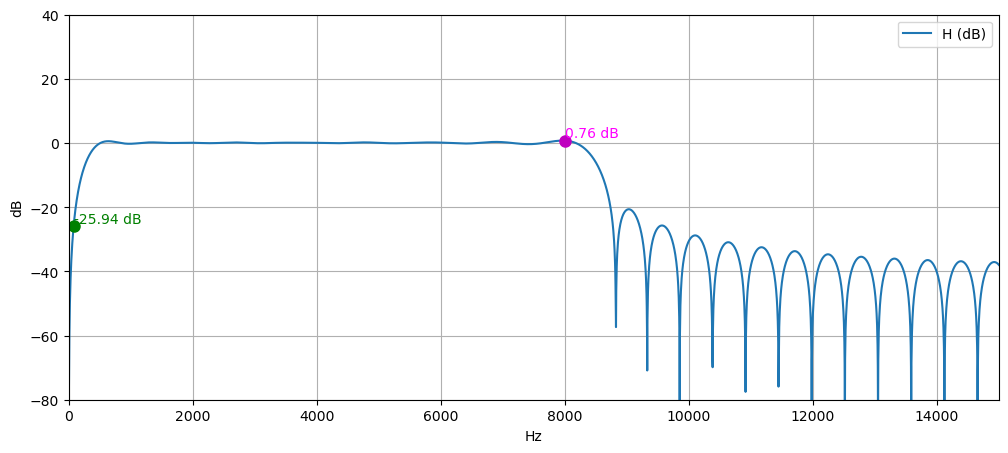

In [ ]:

f_marks = [80,8000]

H1_dB = 20 * np.log10(np.abs(H1) + eps)


H1_marks = np.interp(f_marks, w, H1_dB)


plt.figure(figsize=(12,5))
plt.plot(w, H1_dB, label='H1 (dB)')
plt.xlim(0,15000)
plt.ylim(-80,40)
plt.grid()
plt.xlabel("Hz")
plt.ylabel("dB")


plt.plot(f_marks[0], H1_marks[0], 'go', markersize=8)
plt.text(f_marks[0], H1_marks[0] + 1, f"{H1_marks[0]:.2f} dB", color='green')


plt.plot(f_marks[1], H1_marks[1], 'mo', markersize=8)
plt.text(f_marks[1], H1_marks[1] + 1, f"{H1_marks[1]:.2f} dB", color='magenta')

plt.legend()
plt.show()

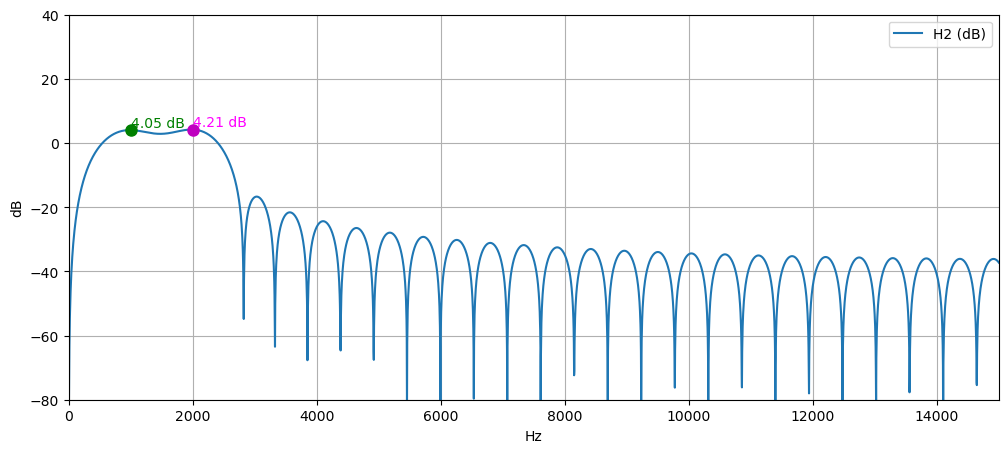

In [51]:

f_marks = [1000,2000]
H2=H2*1.5
H2_dB = 20 * np.log10(np.abs(H2) + eps)


H2_marks = np.interp(f_marks, w, H2_dB)


plt.figure(figsize=(12,5))
plt.plot(w, H2_dB, label='H2 (dB)')
plt.xlim(0,15000)
plt.ylim(-80,40)
plt.grid()
plt.xlabel("Hz")
plt.ylabel("dB")


plt.plot(f_marks[0], H2_marks[0], 'go', markersize=8)
plt.text(f_marks[0], H2_marks[0] + 1, f"{H2_marks[0]:.2f} dB", color='green')


plt.plot(f_marks[1], H2_marks[1], 'mo', markersize=8)
plt.text(f_marks[1], H2_marks[1] + 1, f"{H2_marks[1]:.2f} dB", color='magenta')

plt.legend()
plt.show()

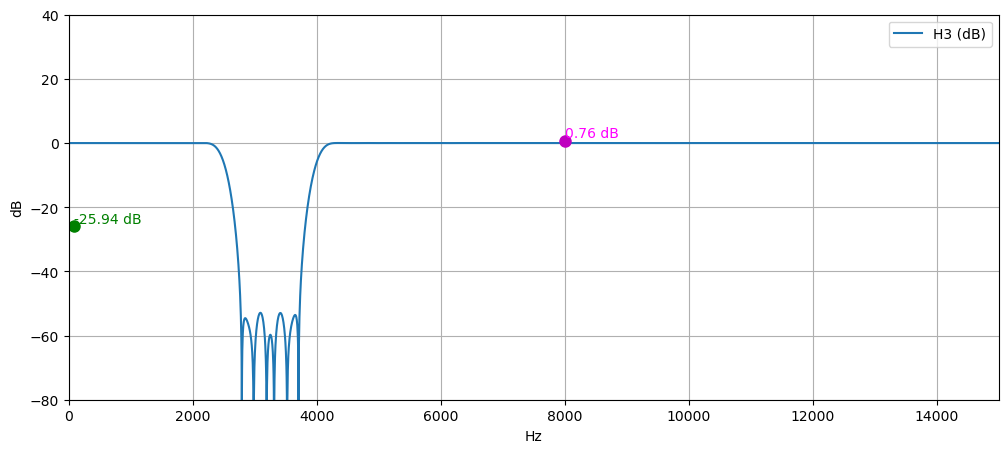

In [52]:

f_marks = [80,8000]

H3_dB = 20 * np.log10(np.abs(H3) + eps)


H3_marks = np.interp(f_marks, w, H1_dB)


plt.figure(figsize=(12,5))
plt.plot(w, H3_dB, label='H3 (dB)')
plt.xlim(0,15000)
plt.ylim(-80,40)
plt.grid()
plt.xlabel("Hz")
plt.ylabel("dB")


plt.plot(f_marks[0], H3_marks[0], 'go', markersize=8)
plt.text(f_marks[0], H3_marks[0] + 1, f"{H3_marks[0]:.2f} dB", color='green')


plt.plot(f_marks[1], H3_marks[1], 'mo', markersize=8)
plt.text(f_marks[1], H3_marks[1] + 1, f"{H3_marks[1]:.2f} dB", color='magenta')

plt.legend()
plt.show()

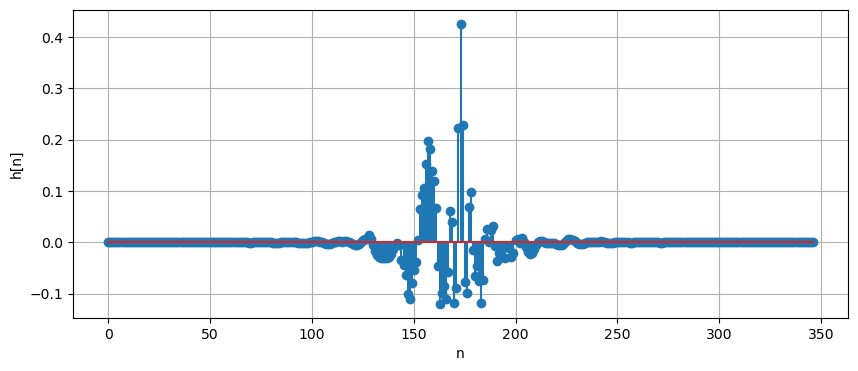

In [ ]:
L1 = len(h1)
L2 = len(h2)
Lmax = max(L1, L2)

h1_pad = np.pad(h1, (0, Lmax - L1))
h2_pad = np.pad(h2, (0, Lmax - L2))

h_parallel = h1_pad + 1.4 * h2_pad
h_total = np.convolve(h_parallel, h3)

plt.figure(figsize=(10,4))
plt.stem(h_total)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()
plt.show()



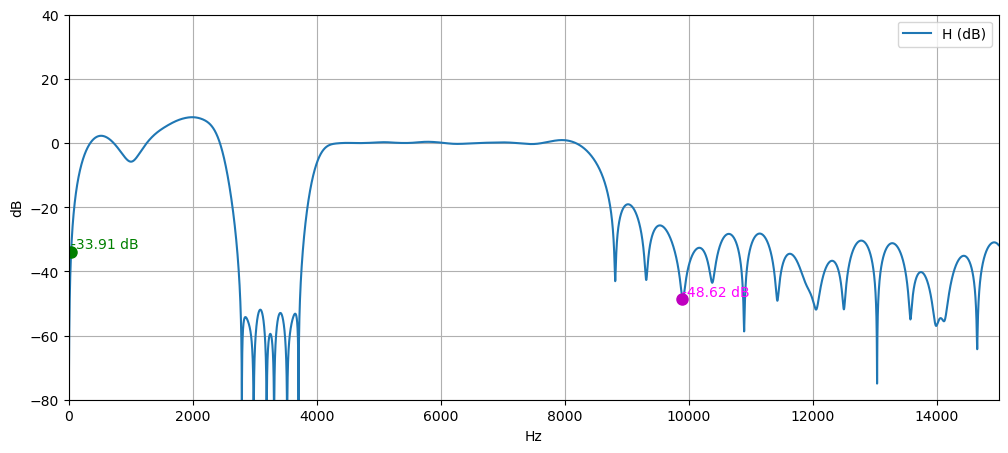

In [ ]:

H4 =  (H1+1.4*H2)*H3

f_marks = [40,9900]

H4_dB = 20 * np.log10(np.abs(H4) + eps)


H4_marks = np.interp(f_marks, w, H4_dB)


plt.figure(figsize=(12,5))
plt.plot(w, H4_dB, label='H (dB)')
plt.xlim(0,15000)
plt.ylim(-80,40)
plt.grid()
plt.xlabel("Hz")
plt.ylabel("dB")


plt.plot(f_marks[0], H4_marks[0], 'go', markersize=8)
plt.text(f_marks[0], H4_marks[0] + 1, f"{H4_marks[0]:.2f} dB", color='green')


plt.plot(f_marks[1], H4_marks[1], 'mo', markersize=8)
plt.text(f_marks[1], H4_marks[1] + 1, f"{H4_marks[1]:.2f} dB", color='magenta')

plt.legend()
plt.show()



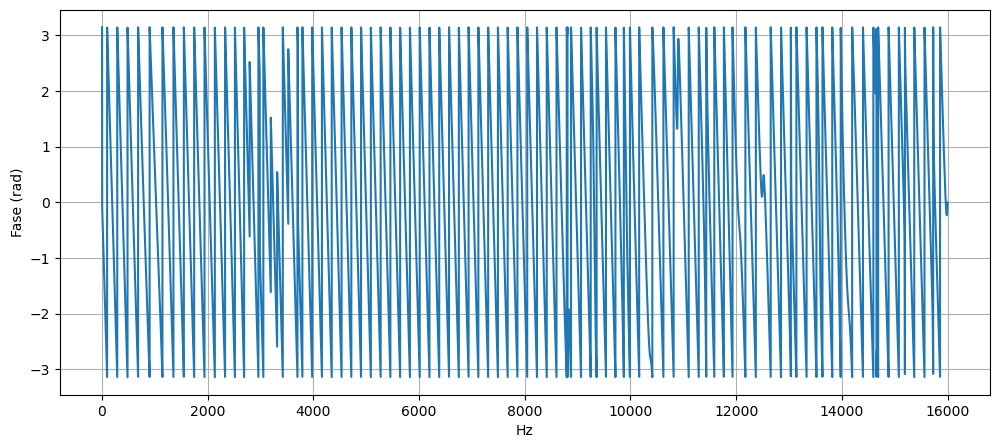

In [35]:
H4_phase = np.angle(H4)

plt.figure(figsize=(12,5))
plt.plot(w, H4_phase, label ='H (Phase)')
plt.xlabel("Hz")
plt.ylabel("Fase (rad)")
plt.grid()
plt.show()
